In [2]:
import numpy as np 
import matplotlib.pyplot as plt

In [318]:
def edge_left(edge, a): 
    for _ in range(len(a)):
        if edge == 0: # handle the edge case
            return edge
        if a[edge - 1] > a[edge]:
            edge = edge - 1
    return edge

def edge_right(edge, a): 
    for _ in range(len(a)):
        if edge == len(a) - 1: # handle the edge case
            return edge
        if a[edge + 1] > a[edge]:
            edge = edge + 1
    return edge


In [322]:
def is_peak(a, point):
    if point == 0 or point == len(a) - 1:
        return False
    if a[point-1] < a[point] >= a[point+1]:
        return True
    return False


def right(r, a):
        for index in range(r + 1, len(a)):
            c = is_peak(a, index)
            if c and a[index] > a[r]:
                r = index
        return r

def left(l, a):
        for index in range(1, l + 1):
            c = is_peak(a, index)
            if c and a[index] > a[l]:
                l = index
        return l

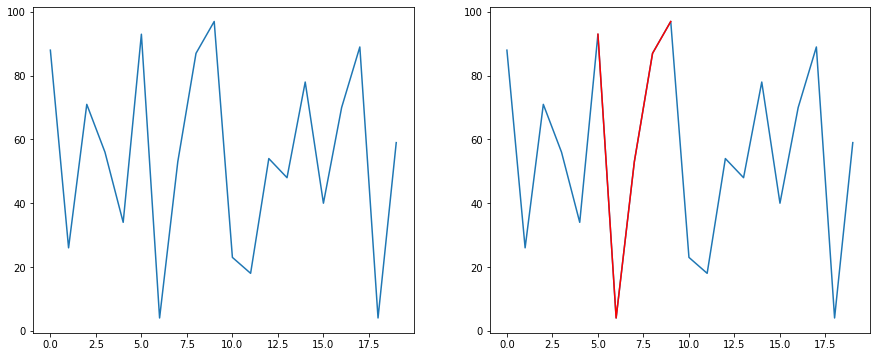

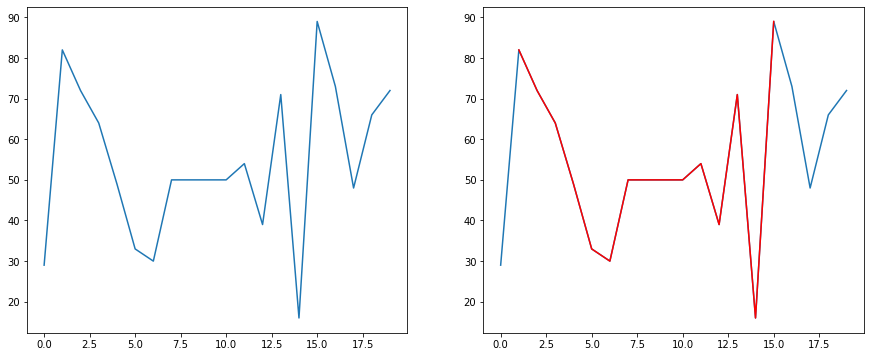

In [323]:
def find_deepest_lake(random_seed = False):
    # Random seed 2023 like in the example
    if random_seed:np.random.seed(2023)
    a = np.random.randint(1,100,20)
    
    # create a dict to store the depth and its indices
    depths = {}

    
    for num in range(1 , len(a) - 1):
        # Find all the "lakes" (if i-1 > i < i+1 means its a lake)
        if a[num-1] > a[num] <= a[num+1]:
            l, r = num - 1, num + 1
            # Getting all the edges (edge if i-1 > i for left edge and i + 1 > i for right edge)
            l, r = edge_left(l, a), edge_right(r, a)
            l, r = left(l, a), right(r,  a)
            # Calculating the depth of the lake
            depth = min(a[l],a[r]) - a[num]
            # Store the depth and it`s index
            depths[depth] = num 

    # Getting value of max depth        
    max_key = max(depths)
    max_value = depths[max_key]
    
    # Once again finding the edges
    
    l, r = edge_left(max_value, a), edge_right(max_value, a)
    l, r = left(l, a), right(r, a)

    # Plotting the result
    figure, axis = plt.subplots(1,2, figsize=(15, 6))

    axis[0].plot(a)     
    axis[1].plot(a)
    axis[1].plot(range(l, r+1), a[l:r+1], color='red')
    

find_deepest_lake(random_seed = True)
find_deepest_lake(random_seed = False)   

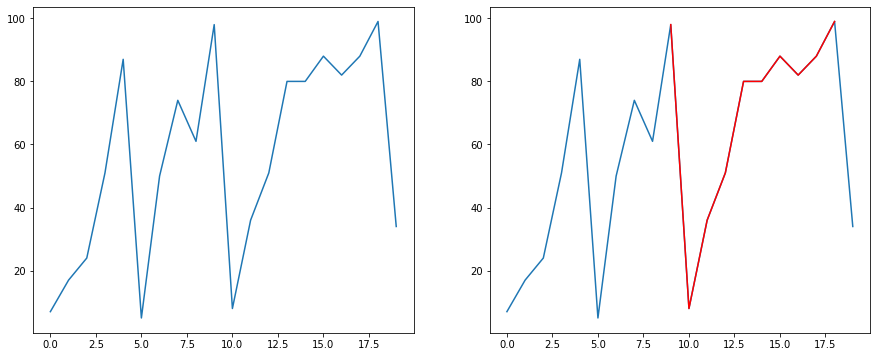

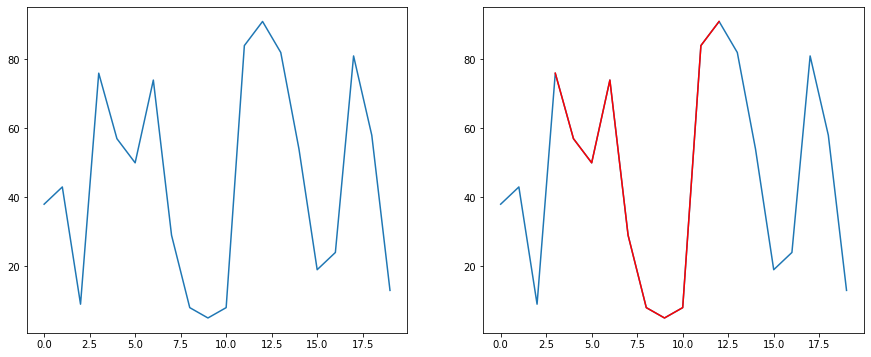

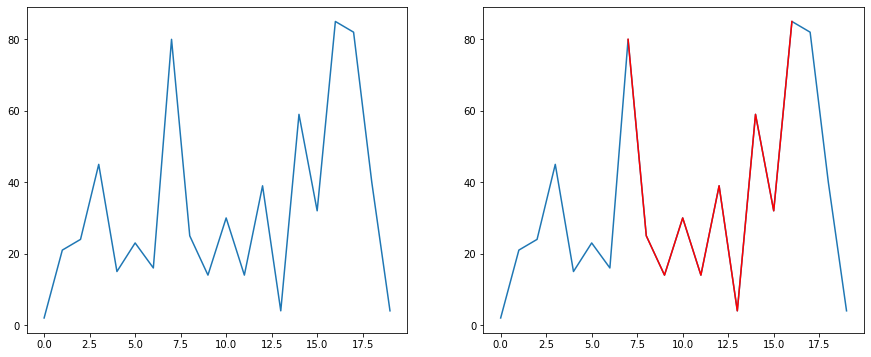

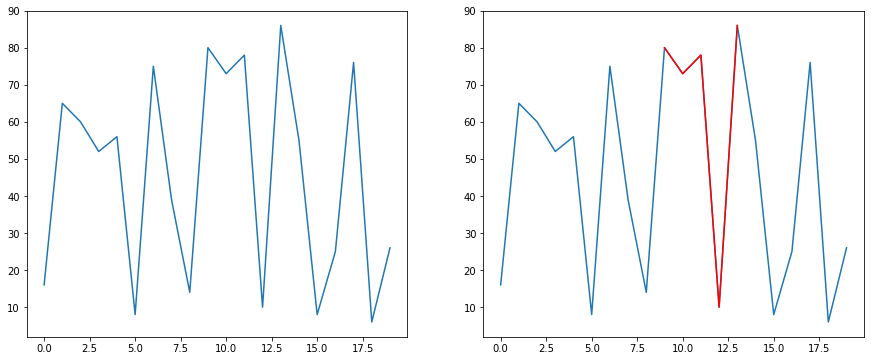

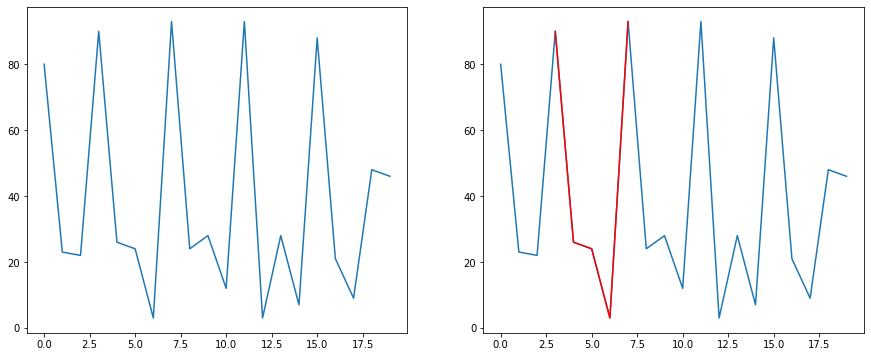

In [288]:
for _ in range(5):
    find_deepest_lake()